## intro
! write intro

In [24]:
# libraries
import pandas as pd
import seaborn as sns
import numpy as np

In [32]:
# config file
from configparser import ConfigParser
def read_config(config_file):
    config = ConfigParser()
    config.read(config_file)
    return config

config = read_config("config.ini")
#mulecules_file = config['FILES']['molecules']
dataframe = config['FILES']['data']

### 20 november
Download and read data. Clear data (also contains metadata with notebook).

### 21 november
! vertalen naar engels
Het lijkt interessant om te kijken naar de invloed van factoren op depressie. Bijvoorbeeld beweging, slaap kwaliteit of inkomen  (of leeftijd, bmi, etc.). Dat je de factoren kan selecteren die je wilt vergelijken misschien ? Op deze manier kun je kijken wat mensen gelukkiger/ongelukkiger maakt. Met deze informatie kun je concluderen welke factoren je kan verbeteren om vooruitgang te boeken in het welzijn van mensen. \
Of kijken naar corrolatie tussen werkuren en burnout ? \
Maar de vraag is nu hoe we dit gaan visualiseren. \
Of misschien iets doen met verschil tussen T1, T2 en T3 ? \
Nog verder over nadenken de komende dagen.

Voor nu eerst data inladen.


In [33]:
# load the data
data = pd.read_csv(dataframe, header = 0)
data.head()


FileNotFoundError: [Errno 2] No such file or directory: "'/homes/ieineke/Documents/kwartaal_6/datadashboards/Dataset/betere_namen/Lifelines_Public_Health_dataset_2024.csv'"

In [27]:
# print limit (not important)

# max amount of rows that the system can print (60)
# if there are more lines: only the header, first 5 and last 5 rows will be printed
print("Max amount of rows:", pd.options.display.max_rows)

# allows more lines to be printed (not necessary)
# pd.options.display.max_rows = 9999

Max amount of rows: 60


## 25 november 
Installed a library: 'pip install seaborn' and 'pip install seaborn[stats]' to make plots.
For now; getting familair with the library and trying some things out.

## 26 november

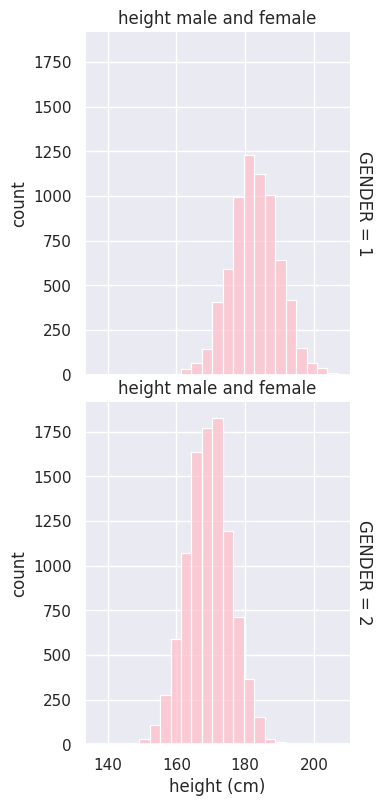

In [ ]:
# trying histogram plot, fail

sns.set_theme(style="darkgrid")
df = data

# making the plot
plot = sns.displot(
    df, x="HEIGHT_T1", row="GENDER",
    binwidth=3, height=4, facet_kws=dict(margin_titles=True), color="pink"
)

# add labels to the axis and title to the plot
plot.set(xlabel ="height (cm)", ylabel = "count", title ='height male and female')

In this plot is the amount of the heights displayed. One plot for the females and one for the males. The gender=1 is the male gender. gender=2 is the female gender. \
Those labels are a bit unclear. Let's try to improve those.
Maby i can make the female plot pink and the male plot blue. I can't set the colours for each seperate plot. That is probably beacause seaborn thinks these two plots are one in a way.
So let's try to make the two plots seperate so we can adjust the colour for each plot.

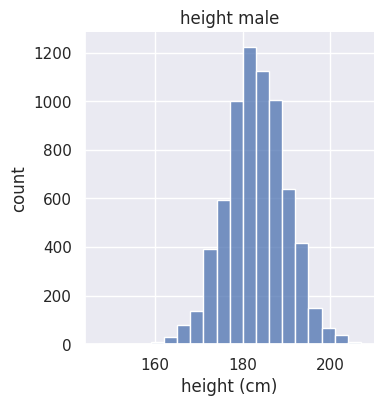

In [ ]:
# trying histogram plot, fail

sns.set_theme(style="darkgrid")
df = data

male_df = df.loc[df['GENDER'] == 1]

# making the plot
plot_male = sns.displot(
    male_df, x="HEIGHT_T1",
    binwidth=3, height=4
)

# add labels to the axis and title to the plot
plot_male.set(xlabel ="height (cm)", ylabel = "count", title ='height male')

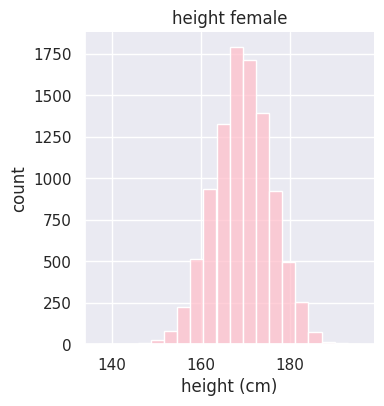

In [ ]:
# trying histogram plot, fail
sns.set_theme(style="darkgrid")
df = data

female_df = df.loc[df['GENDER'] == 2]

# making the plot
plot_female = sns.displot(
    female_df, x="HEIGHT_T1",
    binwidth=3, height=4, color="pink"
)

# add labels to the axis and title to the plot
plot_female.set(xlabel ="height (cm)", ylabel = "count", title ='height female')

The colours are good now. The proportions however are different. Let's try to fix that.

## 27 november

Ramon came up with the idea to make a new colom with the values female and male.

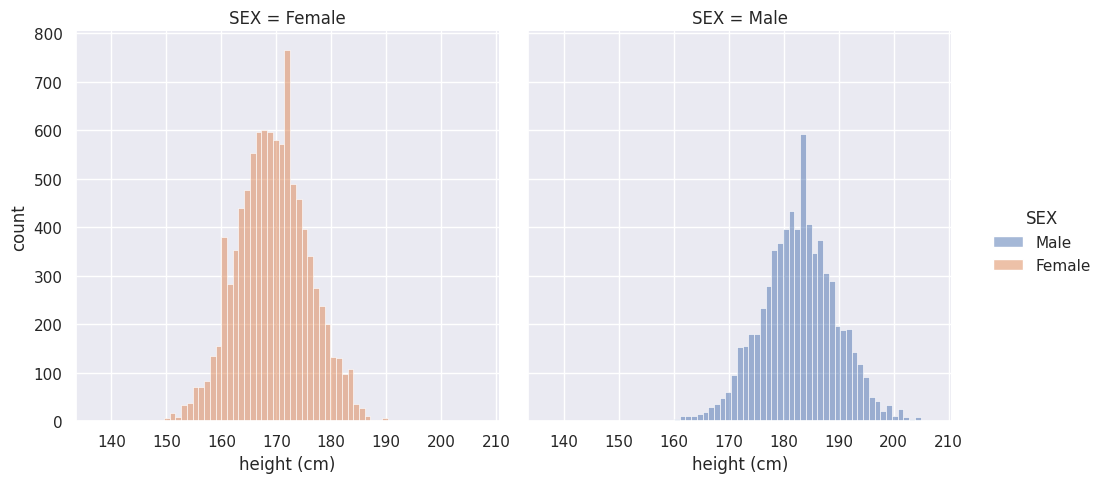

In [ ]:
# height against gender
sns.set_theme(style="darkgrid")
df = data

# new kolom 'SEX' from 'GENDER'
df["SEX"] = np.where(df["GENDER"] == 1, "Male", "Female")

# this switches the plots so that the female plot is pink and the male plot is blue
hue_order_gender = ["Male", "Female"]

# making the plot
plot = sns.displot(
    df, x="HEIGHT_T1", col="SEX",
    hue="SEX", hue_order = hue_order_gender, col_wrap = None)

# add labels to the axis and title to the plot
plot.set(xlabel ="height (cm)", ylabel = "count")


It seems like there were more female than male participants. The male average height is slightly higher than the female. Now lets make a plot with the colom that will be used for the dashboard (depression). The first colom i want to compare the "DEPRESSION_T1" colom to is pysical activity. The reason for this choice is that specialists usualy say that people with depression should do more physical activity. \
There are multiple coloms with information about physial acticity: SCOR_val, MWK_NO_VAL, SCOR_NO_VAL, SPORTS_T1. The SCOR_VAL contains the most complete picture of physical activity, because it contains the occupational information as well. Next question is which plot to use for these coloms ?

In [ ]:
# "DEPRESSION_T1"(0/1) tegen "SCOR_VAL"(float)

# "SCOR_VAL"(float):
# Score for weekly physical activity on moderate and vigorous intensity level,
# based on the sum of minutes per activity times the intensity of the specific
# activity at baseline (T1)

## Workflow:
Gevraagd wat de beste manier is om met de functies om te gaan: \
In logboek zonder functies. Vervolgens een python bestand met alles wat gebruikt wordt maken en daar wel functies in toepassen.

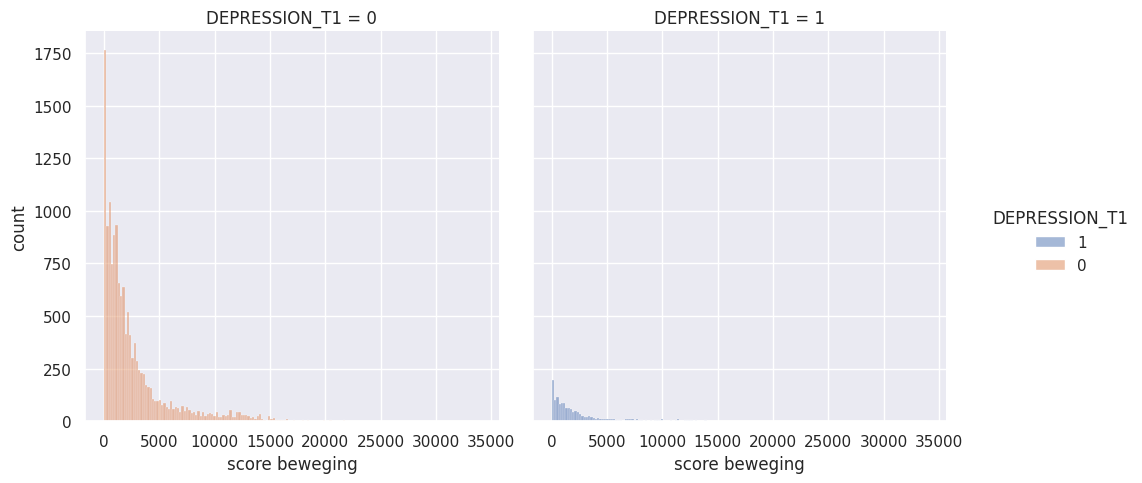

In [ ]:
# depression against fysical_activity:
sns.set_theme(style="darkgrid")
df = data

hue_order_depression = [1, 0]
# new kolom 'SEX' from 'GENDER'
# df["SEX"] = np.where(df["GENDER"] == 1, "Male", "Female")

# this switches the plots so that the female plot is pink and the male plot is blue
# hue_order = ["Male", "Female"]

# making the plot
plot = sns.displot(
    df, x="SCOR_VAL", col="DEPRESSION_T1",
    hue="DEPRESSION_T1", col_wrap = None, hue_order=hue_order_depression)

# add labels to the axis and title to the plot
plot.set(xlabel ="score beweging", ylabel = "count")


The plot still needs to be made prettier and more readable and the proportions are off. Need to fix that first. The y-as has to be in percentages. \

Percentage = (alle_count_depression / beweging_count_depression) *100

## 28 november

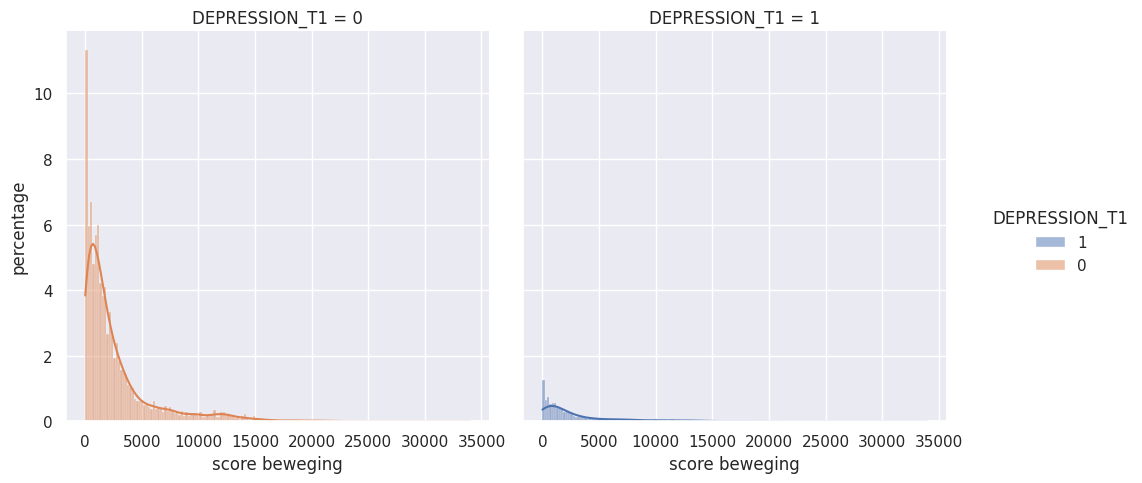

In [ ]:
# depression against fysical_activity:
sns.set_theme(style="darkgrid")
df = data

# new kolom 'SEX' from 'GENDER'
# df["SEX"] = np.where(df["GENDER"] == 1, "Male", "Female")

# this switches the plots so that the female plot is pink and the male plot is blue
# hue_order = ["Male", "Female"]

# making the plot
plot = sns.displot(
    df, x="SCOR_VAL", col="DEPRESSION_T1",
    hue="DEPRESSION_T1", stat="percent", kde=True,hue_order=hue_order_depression)

    

# add labels to the axis and title to the plot
plot.set(xlabel ="score beweging", ylabel = "percentage")

It is in percentages now, but there is still a realy big difference. I'm afraid the percentage is of the all the participants and not just per people with depression and people without depression.
So lets make a subgroup. I need a group with people with depresion and a group with people without depression. These subgroups are probably also needed for the dashboard.


let's test if my theory about the proportions is right. 

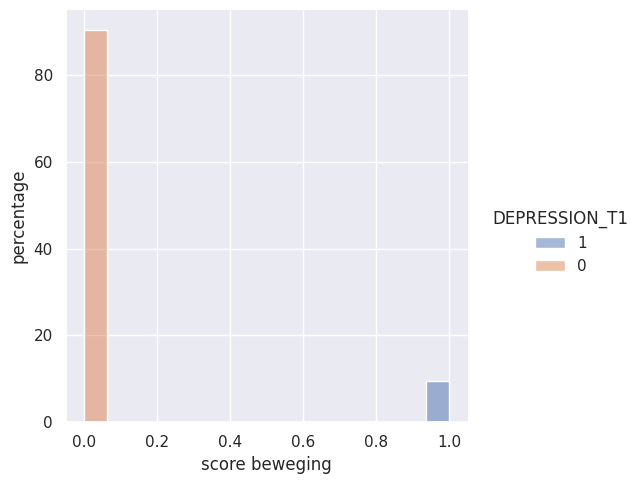

In [ ]:
# testing proportions:
sns.set_theme(style="darkgrid")
df = data

# making the plot
plot = sns.displot(
    df, x="DEPRESSION_T1",
    hue="DEPRESSION_T1", stat="percent", kde=True, hue_order=hue_order_depression)


# add labels to the axis and title to the plot
plot.set(xlabel ="score beweging", ylabel = "percentage")

In this plot you can see that the total percentage is 100%.

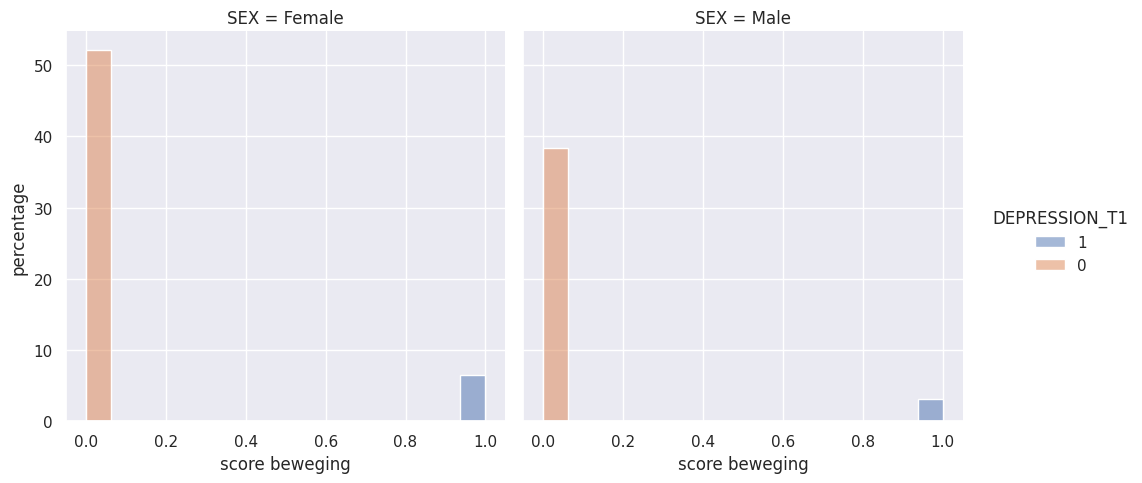

In [ ]:
# testing proportions:
sns.set_theme(style="darkgrid")

# making the plot
plot = sns.displot(
    data, x="DEPRESSION_T1", col="SEX",
    hue="DEPRESSION_T1", stat="percent", kde=True, hue_order=hue_order_depression)


# add labels to the axis and title to the plot
plot.set(xlabel ="score beweging", ylabel = "percentage")

In this plot you can see clearer that both plots together are 100%. So my guess was right. The data needs to be split in subsets. One with depression and one without depression.

In [ ]:
# subgroups: depression + no_depression ?
# groupby uitzoeken
# df_depression = data.groupby("DEPRESSION_T1")

## 3 december

Let's make the subsets today.

In [ ]:
# making a subset depression

# select the right colomn
data_depression = data[(data["DEPRESSION_T1"] == 1)]

data_no_depression = data[(data["DEPRESSION_T1"] == 0)]


In [ ]:
data_depression["DEPRESSION_T1"]

6        1
8        1
15       1
23       1
37       1
        ..
16635    1
16640    1
16641    1
16643    1
16670    1
Name: DEPRESSION_T1, Length: 1588, dtype: int64

In [ ]:
data_no_depression["DEPRESSION_T1"]


0        0
1        0
2        0
3        0
4        0
        ..
16691    0
16692    0
16693    0
16694    0
16695    0
Name: DEPRESSION_T1, Length: 15108, dtype: int64

The code to make a subset is working now. There are brackets '()' added to the code. Without them the code can't find any people without depression, it is unclear why. Because when u use a true false statement with simelair code, it can only find people without depression. To me it is unclear why it does that, but with the brackets it works. \
The depression subset contains all rows with in the 'DEPRESSION_T1' colomn a one. This equals depression. And the subset with people without depression has zero's in the 'DEPRESSION_T1', which equals no depression. Also the length of the people with no depression is 15108 and the length of people with depression is 1588. This is simulair to the plots before. Because these showed that the people with depression would be around 10% of all the people (and the sum of those is the same as the rows in the full data).


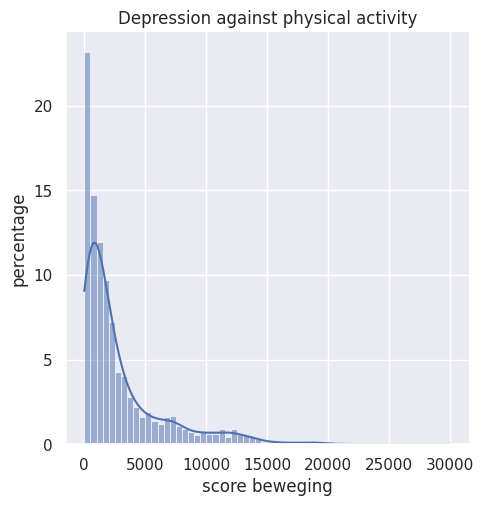

In [ ]:
# testing proportions:
sns.set_theme(style="darkgrid")


# making the plot
plot = sns.displot(
    data_depression, x="SCOR_VAL", stat="percent", kde=True)

    

# add labels to the axis and title to the plot
plot.set(xlabel ="score beweging", ylabel = "percentage", title="Depression against physical activity")



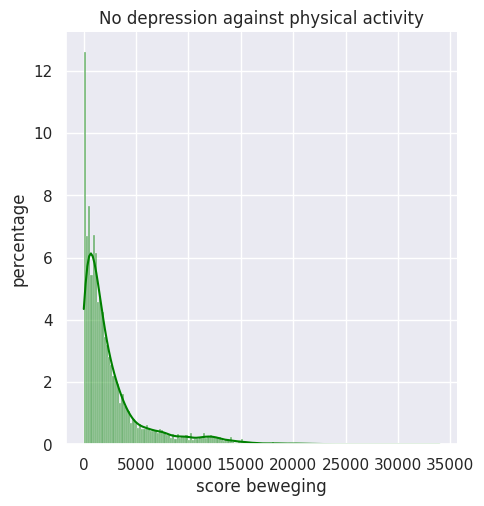

In [ ]:
# testing proportions:
sns.set_theme(style="darkgrid")


# making the plot
plot = sns.displot(
    data_no_depression, x="SCOR_VAL", stat="percent", kde=True, color="green")

    

# add labels to the axis and title to the plot
plot.set(xlabel ="score beweging", ylabel = "percentage", title="No depression against physical activity")



Next step is to put the two plots over each other. This way you will be able to see the differences more clear.

## 4 december
Michiel gaf de tip om groupby te gebruiken. Omdat je hierbij behouwd dat de assen hetzelfde blijven. Waardoor de plot betrouwbaarder is en beter af te lezen.

In [ ]:
depression_grouped_data = data.groupby(by="DEPRESSION_T1")